In [2]:
import pandas as pd
import numpy as np
import operator
#data_103=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/103年來臺旅客消費及動向調查.csv')
#data_104=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/104年來臺旅客消費及動向調查(原始資料).csv')
#data_105=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/105年來臺旅客消費及動向調查(原始資料).csv')
#data_106=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/106年來臺旅客消費及動向調查_原始資料_1內容.csv')
#print(data_103.info())
#print(data_104.info())
#print(data_105.info())
#print(data_106.info())
data_all=pd.read_csv('/Users/Mac/taiwan-tourism/data/all.csv')
#print(data_all.info())

In [3]:
#data_103=data_103[['id','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
#data_104=data_104[['id','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
#data_105=data_105[['id','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
#data_106=data_106[['id','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
#merge_data=pd.concat([data_103,data_104,data_105,data_106],axis=0) #合併dataframe
t_data=data_all[['id','nation','purp1','sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]

#t_data=pd.merge(all_data,merge_data,how='inner', on='id')
print(t_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23989 entries, 0 to 23988
Data columns (total 18 columns):
id        23989 non-null int64
nation    23989 non-null int64
purp1     23989 non-null int64
sp01      23873 non-null float64
sp02      23315 non-null float64
sp03      22264 non-null float64
sp04      20733 non-null float64
sp05      18584 non-null float64
sp06      16273 non-null float64
sp07      13914 non-null float64
sp08      11786 non-null float64
sp09      10002 non-null float64
sp10      8562 non-null float64
sp11      7409 non-null float64
sp12      6379 non-null float64
sp13      5395 non-null float64
sp14      4331 non-null float64
sp15      3104 non-null float64
dtypes: float64(15), int64(3)
memory usage: 3.3 MB
None


In [4]:
t_data=t_data.convert_objects(convert_numeric=True)
t_data=t_data[t_data['purp1']==1]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [5]:
jp_data=t_data[t_data['nation']==1]
ch_data=t_data[t_data['nation']==2]
ko_data=t_data[t_data['nation']==5]
si_data=t_data[t_data['nation']==4]
as_data=t_data[t_data['nation']==6]
eu_data=t_data[t_data['nation']==8]

In [6]:
def spot_dict(country_data):
    spot={}
    country_data=country_data[['sp01','sp02','sp03','sp04','sp05','sp06','sp07','sp08','sp09','sp10','sp11','sp12','sp13','sp14','sp15']]
    for i in country_data.columns:
        for j in range(len(list(country_data[i]))):
            if list(country_data[i])[j]>0:
                if list(country_data[i])[j] not in spot:
                    spot[list(country_data[i])[j]]=1
                else:
                    spot[list(country_data[i])[j]]+=1
    #spot=sorted(spot.items(), key=operator.itemgetter(1), reverse=True)
    return spot

def to_frame(i_spot):
    i_list1=list(i_spot.keys())
    i_list2=list(i_spot.values())
    i_dict={'id':i_list1, 'number':i_list2}
    i_spot=pd.DataFrame.from_dict(i_dict)
    i_spot=i_spot.sort_values(by=['number'],ascending=False)
    i_spot=i_spot.iloc[0:20,]
    ss=0
    for v in list(i_spot['number']):
        ss+=v**2
    mrs=np.sqrt(ss)
    i_spot['num_std']=i_spot['number']/mrs
    return i_spot

In [7]:
jp_spot=spot_dict(jp_data)
jp_spot=to_frame(jp_spot)
as_spot=spot_dict(as_data)
as_spot=to_frame(as_spot)
ch_spot=spot_dict(ch_data)
ch_spot=to_frame(ch_spot)
ko_spot=spot_dict(ko_data)
ko_spot=to_frame(ko_spot)
si_spot=spot_dict(si_data)
si_spot=to_frame(si_spot)
eu_spot=spot_dict(eu_data)
eu_spot=to_frame(eu_spot)



In [10]:
#整理出所有國家遊客的top10景點
spot_list=list(jp_spot['id'])+list(ch_spot['id'])+list(ko_spot['id']+list(as_spot['id'])+list(si_spot['id'])+list(eu_spot['id']))
spot_list=list(set(spot_list))
spot_name=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/spot_name.csv')
spot_name=spot_name.convert_objects(convert_numeric=True)
all_spot=spot_name[spot_name['id'].isin(spot_list)]  #用isin()來挑出id有在spot_list裡的rows
all_spot.to_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/all_spot.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


In [12]:
#畫地圖函式
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_map(all_spot2,country):
    plt.figure(figsize=(32,16)) #開一張圖
    plt.title(country)
    m = Basemap(llcrnrlon = 119.3, llcrnrlat = 21, urcrnrlon = 123, urcrnrlat = 26,resolution = 'h', epsg = 3415) #使用basemap 定位在台灣附近的經緯度
    m.drawcoastlines() #畫出線條
    m.readshapefile('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/mapdata201805310314/COUNTY_MOI_1070516','COUNTY_MOI_1070516') #導入行政區劃圖 （檔名要重複兩次）
    #以下是畫上景點
    for s in range(len(list(all_spot2['id']))):   
        lon=list(all_spot2['lon'])[s]
        lat=list(all_spot2['lat'])[s]
        num=list(all_spot2['num_std'])[s]
        x, y = m(lon, lat)
        m.scatter(x, y, marker = 'o', color = 'm',s=num*600) #marker=>形狀  color=>顏色  s=>大小 
    plt.show()
    
def draw_map_newTaipei(all_spot2,country):
    plt.figure(figsize=(24,12)) #開一張圖
    plt.title(country)
    m = Basemap(llcrnrlon = 121.149265, llcrnrlat = 24.9, urcrnrlon = 122.076999, urcrnrlat = 25.376272,resolution = 'h', epsg = 3415) #使用basemap 定位在新北附近的經緯度
    m.drawcoastlines() #畫出線條
    m.readshapefile('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/mapdata201805310314/COUNTY_MOI_1070516','COUNTY_MOI_1070516') #導入行政區劃圖 （檔名要重複兩次）
    #以下是畫上景點
    for s in range(len(list(all_spot2['id']))):   
        lon=list(all_spot2['lon'])[s]
        lat=list(all_spot2['lat'])[s]
        num=list(all_spot2['num_std'])[s]
        x, y = m(lon, lat)
        m.scatter(x, y, marker = 'o', color = 'm',s=num*2000) #marker=>形狀  color=>顏色  s=>大小 
    plt.show()

In [14]:
all_spot2=pd.read_csv('/Users/Mac/Desktop/2018 fall/社會科學資料研究/期末報告/103_106消費及動向/all_spot_2.csv')
all_spot2=all_spot2.convert_objects(convert_numeric=True)
all_spot2=all_spot2[['id','name','lon','lat']]

#以下為join各國top 10的frame以及景點位置的frame
jp_spot2=pd.merge(jp_spot,all_spot2 ,how='inner', on='id')
ch_spot2=pd.merge(ch_spot,all_spot2 ,how='inner', on='id')
ko_spot2=pd.merge(ko_spot,all_spot2 ,how='inner', on='id')
as_spot2=pd.merge(as_spot,all_spot2 ,how='inner', on='id')
si_spot2=pd.merge(si_spot,all_spot2 ,how='inner', on='id')
eu_spot2=pd.merge(eu_spot,all_spot2 ,how='inner', on='id')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


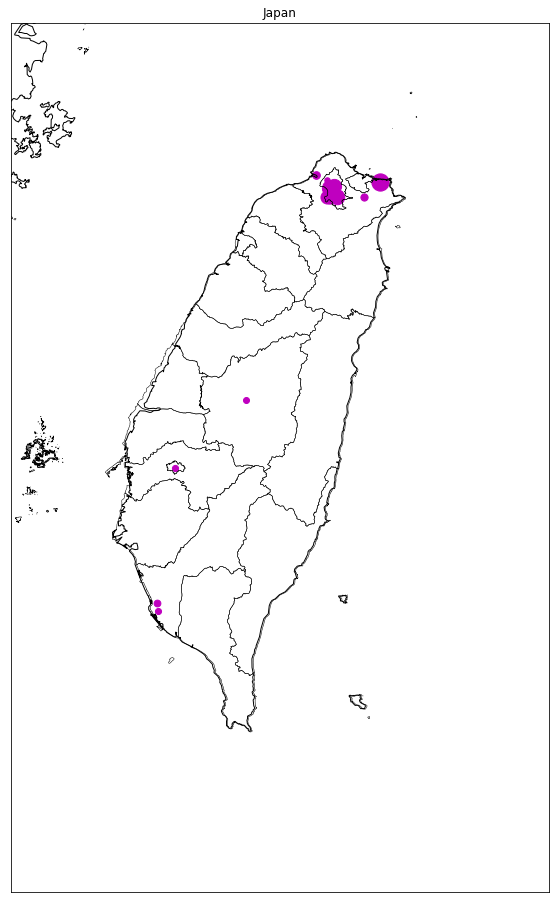

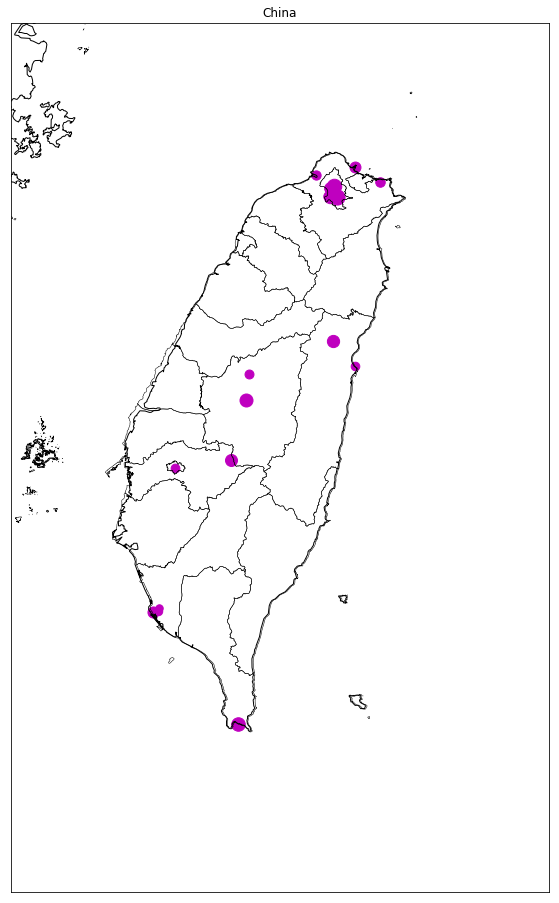

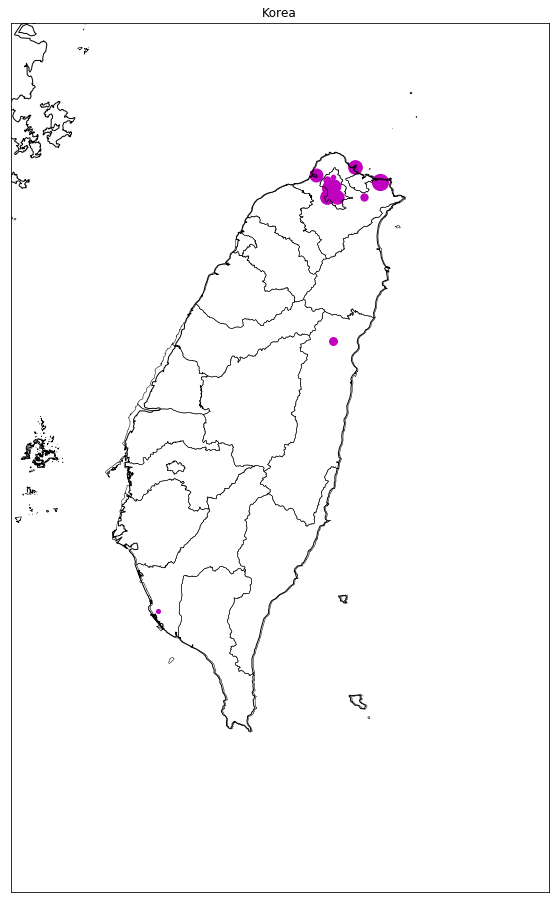

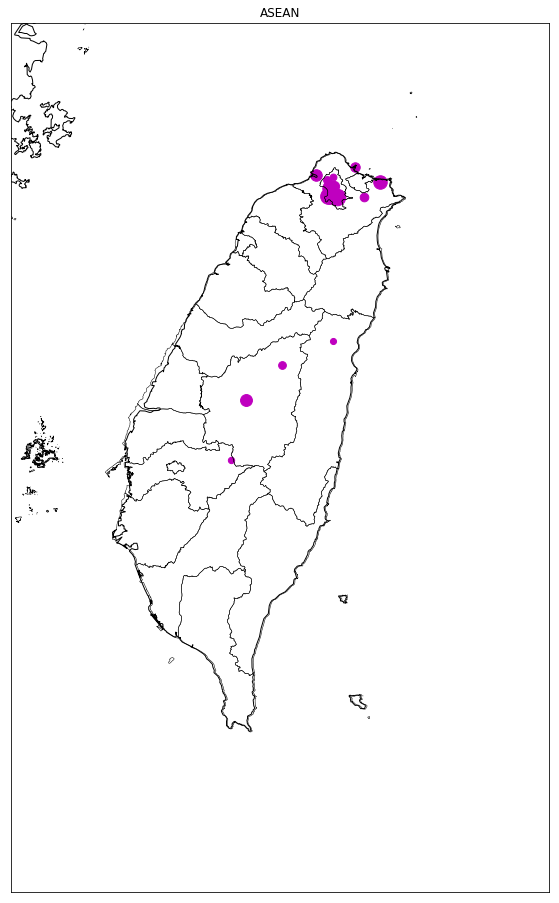

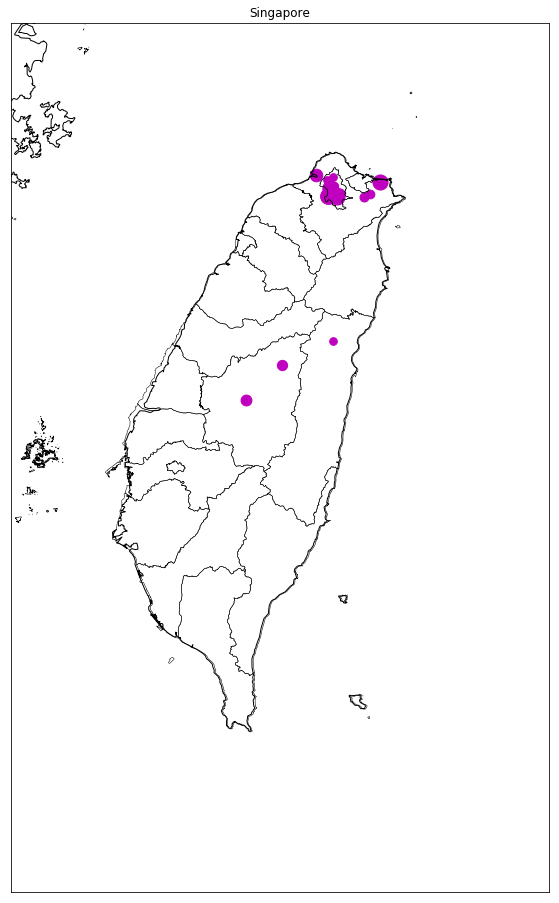

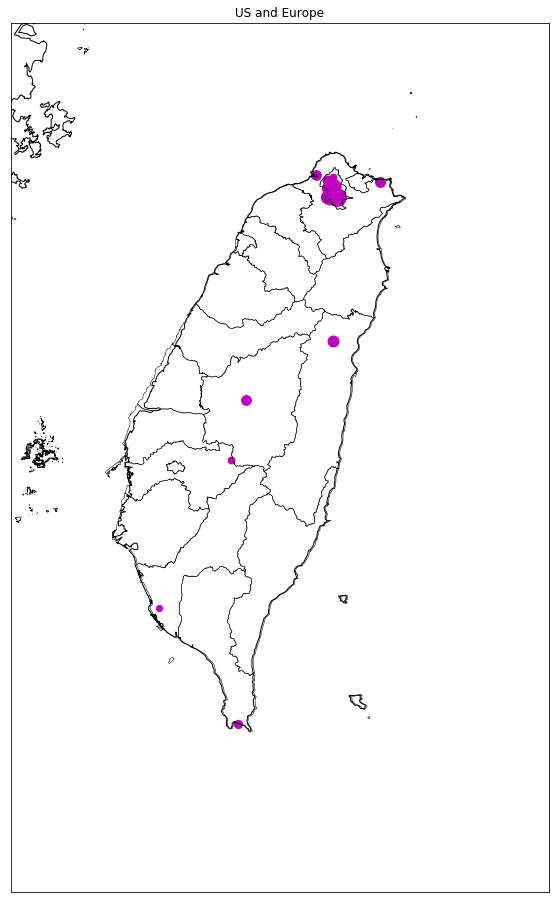

In [16]:
draw_map(jp_spot2,'Japan')
draw_map(ch_spot2,'China')
draw_map(ko_spot2,'Korea')
draw_map(as_spot2,'ASEAN')
draw_map(si_spot2,'Singapore')
draw_map(eu_spot2,'US and Europe')

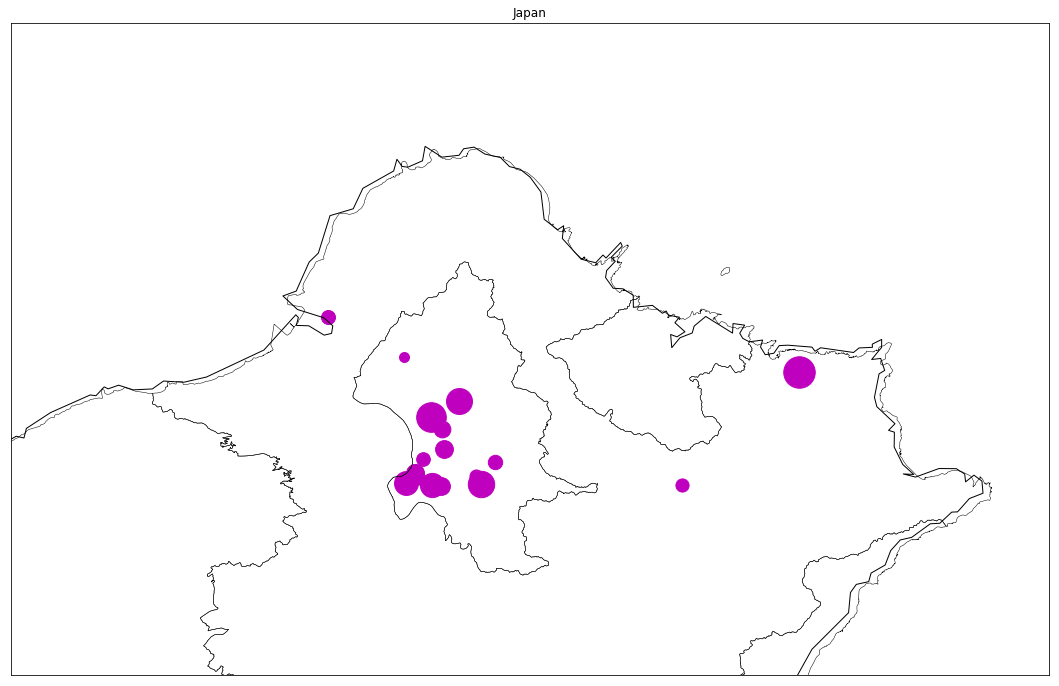

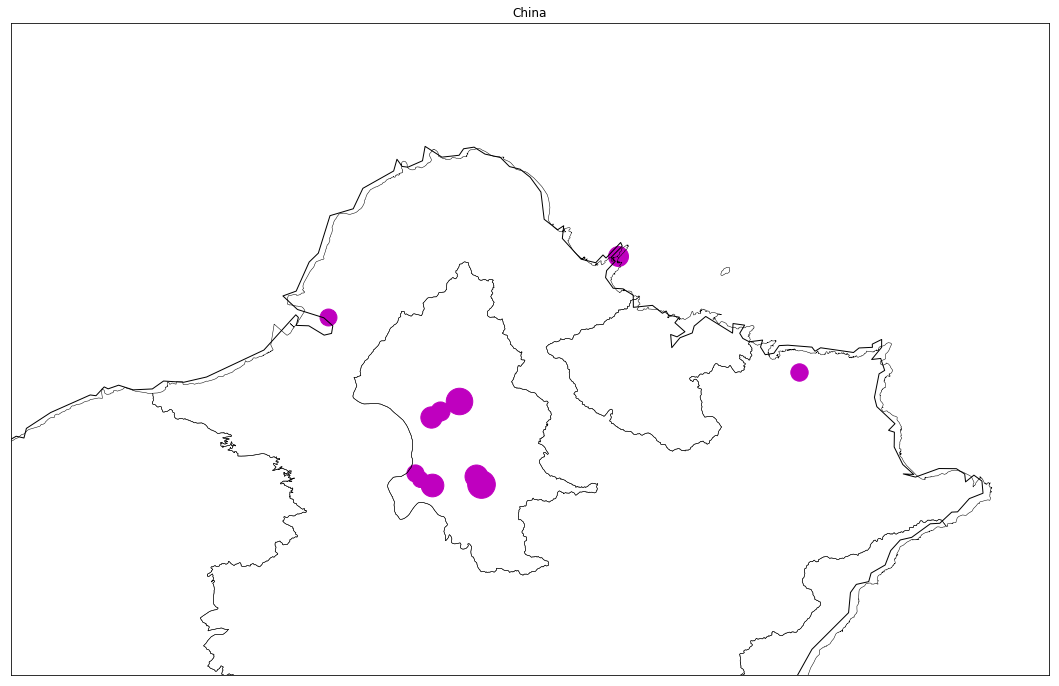

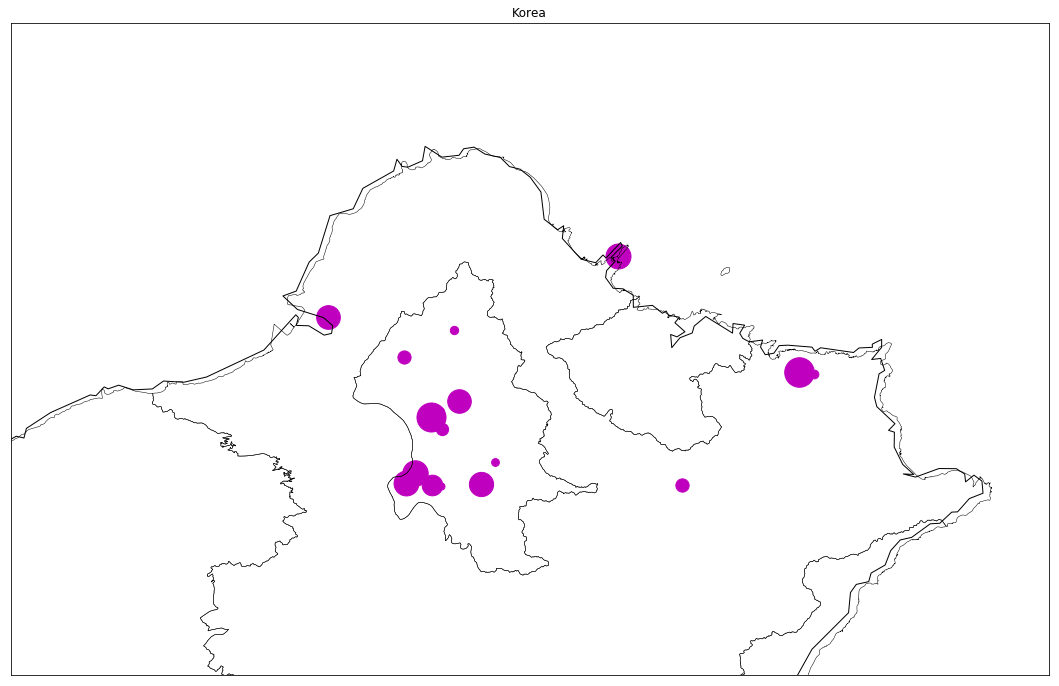

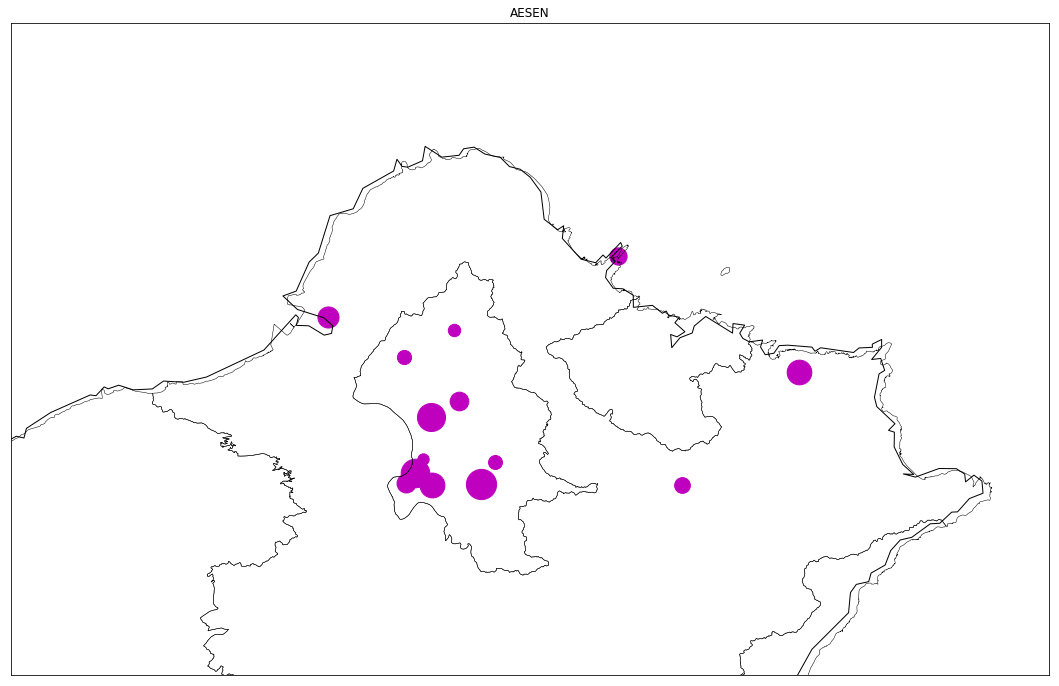

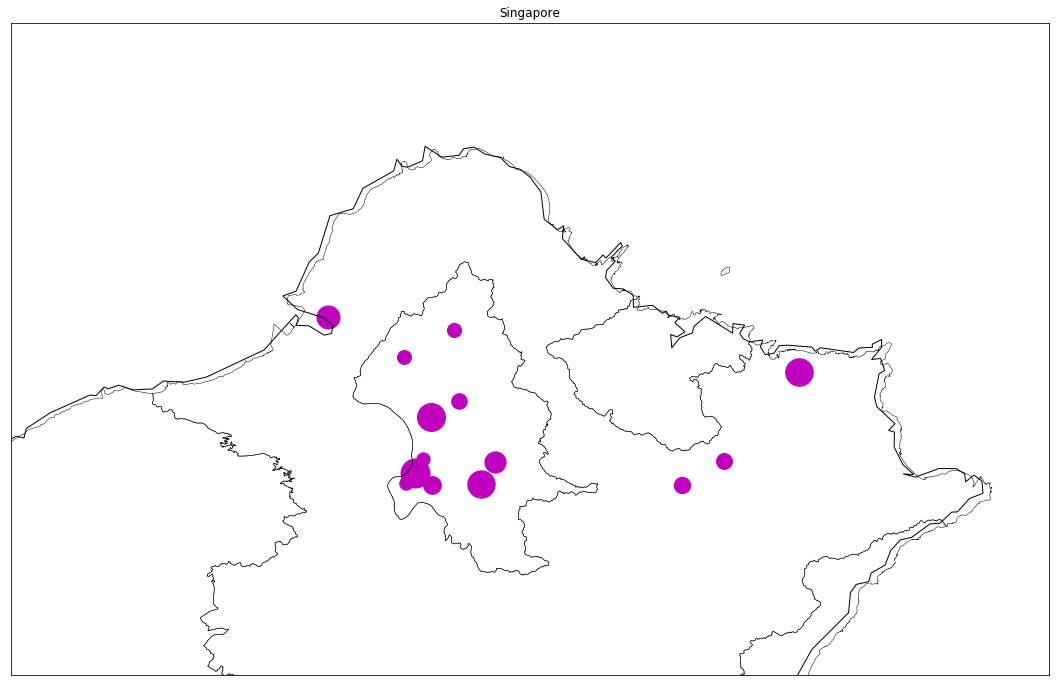

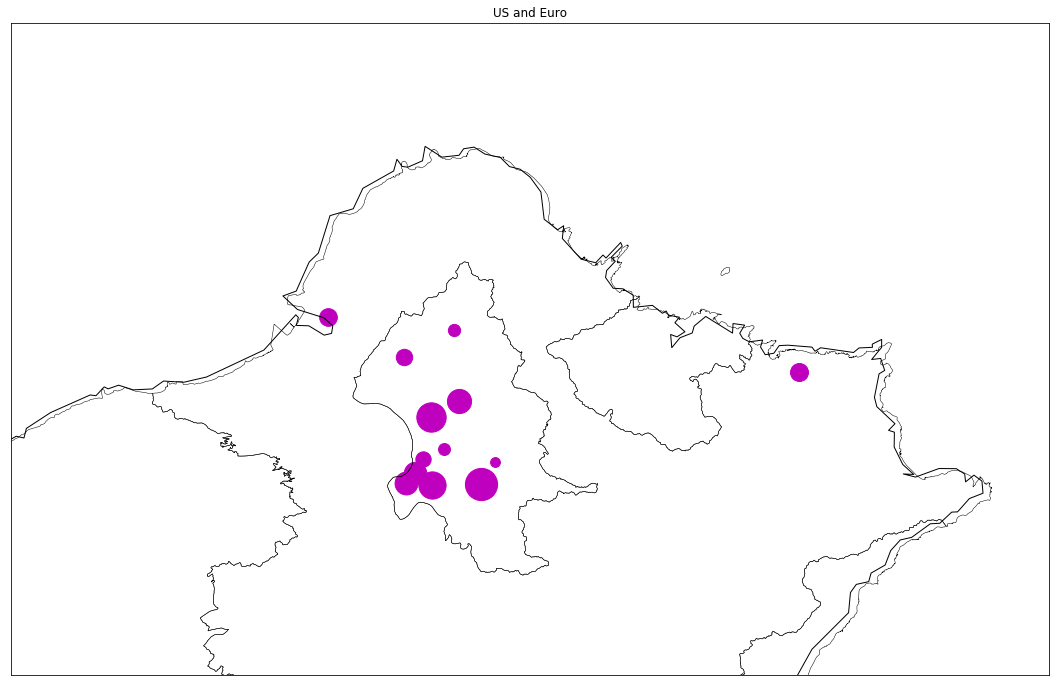

In [17]:
draw_map_newTaipei(jp_spot2,'Japan')
draw_map_newTaipei(ch_spot2,'China')
draw_map_newTaipei(ko_spot2,'Korea')
draw_map_newTaipei(as_spot2,'AESEN')
draw_map_newTaipei(si_spot2,'Singapore')
draw_map_newTaipei(eu_spot2,'US and Euro')